#### ***Reference: Pradhan, Manaranjan; U Dinesh Kumar. Machine Learning using Python. Kindle Edition.*** 

### **How Machine Learns?**
In supervised learning, the algorithm learns using a function called loss function, cost function or error  function, which is a function of predicted output and the desired output.<br>
If $h(X_i)$ is predicted o/p & $y_i$ is desired o/p then loss function is given by sum squared error(SSE). SSE is the loss func. for a reggression model.
$$L = \frac{1}{n}\sum_{i=1}^{n}[h(X_i) - y_i]^2$$
***The objective is  to learn the values of parameters (aka feature weights) that minimize the cost function.*** Machine learning uses optimization algorithms which can be used for minimizing the loss function. Most widely used  optimization technique is called the **Gradient Descent.** 

### ***1. Gradient Descent Algorithm***

- Mathematically SLR is given by, $$Y_i = \beta_o + \beta_1X_i + \epsilon_i$$
where $\beta_o$ is called **bias or intercept**, $\beta_1$ is the **feature weight or regg. coeff.**, $\epsilon_i$ is the **error** in the prediction.

- The predicted value of $Y_i$ is given by $$\hat{Y_i} = \hat{\beta_o} + \hat{\beta_1}X_i$$ where $\hat{\beta_o}$ and $\hat{\beta_1}$ are estimated values of $\beta_o \text{and} \beta_1$.

- The error is given by $\epsilon_i = Y_i - \hat{Y_i}$ <br>And the cost function is the mean squared error(MSE) across all N records. $$MSE = \epsilon_{mse} = \frac{1}{N}\sum_{i=1}^{N}(Y_i - \hat{\beta_o} - \hat{\beta_1}X_i)^2$$

- Gradient descent finds the optimal values of $\beta_o$ and$\beta_1$ that minimize the loss function using the  following steps:  
  1. Randomly guess the initial values of $\beta_o$ (bias or intercept) and $\beta_1$ (feature weight).   
  2. Calculate the estimated value of the outcome variable $Y_i$ for initialized values of bias and weights.  
  3. Calculate the mean square error function (MSE).  
  4. Adjust the $\beta_o$ and$\beta_1$ values by calculating the gradients of the error function. $$\beta_0 = \beta_0 - \alpha\frac{\partial{\epsilon_{mse}}}{\partial{\beta_0}}$$ <br> $$\beta_1 = \beta_1 - \alpha\frac{\partial{\epsilon_{mse}}}{\partial{\beta_1}}$$ <br> where $\alpha$ is the learning rate (a hyperparameter). The value of $\alpha$ is chosen based on the magnitude  of update needed to be applied to the bias and weights at each iteration.<br> The partials are given by $$\frac{\partial{\epsilon_{mse}}}{\partial{\beta_0}} = -\frac{2}{N}\sum_{i=1}^{N}(Y_i - \hat{Y_i})$$<br> $$\frac{\partial{\epsilon_{mse}}}{\partial{\beta_1}} = -\frac{2}{N}\sum_{i=1}^{N}(Y_i - \hat{Y_i})\times X_i$$
  5. Repeat the above steps 1 to 4 until the error stops reducing furthur or the change in cost is infinitesimally small.
  
Thus we get the optimal values of $\beta_o$ and$\beta_1$

### ***1.1 Developing a GD Algo. for Linear Regg. Model***

We use the advertising dataset. The dataset has the following elements:  
   1. TV – Spend on TV advertisements  
   2. Radio – Spend on radio advertisements  
   3. Newspaper – Spend on newspaper advertisements  
   4. Sales – Sales revenue generated

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.pandas.set_option("display.max_columns", None)

In [2]:
sales_df = pd.read_csv(os.getcwd()+"/Data/Advertising.csv")
sales_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# Set X & Y
X = sales_df[['TV', 'Radio', 'Newspaper']]
Y = sales_df['Sales']

In [4]:
# Standardize X and Y, to convert all variavles to one scale
Y = np.array((Y - Y.mean())/Y.std())

X = X.apply(lambda rec: (rec - rec.mean())/rec.std(), axis = 0)

### ***Implementing the GD Algo.***
Steps as explained above are:
- **Step 1**: *Method to randomly initialize the bias and weights.*  
- **Step 2**: *Method to calculate the predicted value of Y ,i.e, Y given the bias and weights.* 
- **Step 3**: *Method to calculate the cost function from predicted and actual values of Y.*
- **Step 4**: *Method to calculate the gradients and adjust the bias and weights.* 

#### **Step 1: Method to randomly initialize the bias and weights**

In [5]:
import random

# dim - # of weights required to be initialized besides the bias 
def initialize(dim):
    np.random.seed(seed=42)
    random.seed(42)
    # Initialize the bias
    b = random.random()
    # Initialize the weights
    w = np.random.rand(dim)
    
    return b, w

In [6]:
# we have 3 i/p variables thus dim = 3
b,w = initialize(3)
print("Bias:",b, "Weights:", w)

Bias: 0.6394267984578837 Weights: [0.37454012 0.95071431 0.73199394]


#### **Step 2: Predict the Y values from the bias and weights.**
 $Y = b + Xw$

In [7]:
def predict_Y(b, w, X):
    return b + np.matmul(X, w) # matmul - matrix multiplication

In [8]:
b,w = initialize(3)
Y_hat = predict_Y(b, w, X)
Y_hat[0:5]

0    3.231496
1    1.707849
2    2.824761
3    2.753090
4    0.924486
dtype: float64

#### **Step 3: Calculate the Cost Function - MSE**

In [9]:
import math

# Y - actual values of y
# Y_hat - predicted value of y
def get_cost(Y, Y_hat):
    Y_resid = Y - Y_hat # error or residuals
    # MAtrix multiplication with the self will give squared values and then we calculate it's mean
    return np.sum(np.matmul(Y_resid.T, Y_resid))/len(Y_resid)

In [10]:
b,w = initialize(3)
Y_hat = predict_Y(b, w, X)
get_cost(Y, Y_hat)

1.5303100198505895

#### **Step 4: Update the Bias and Weight**
Given by
$$\beta_0 = \beta_0 - \alpha\frac{\partial{\epsilon_{mse}}}{\partial{\beta_0}}$$ <br> $$\beta_1 = \beta_1 - \alpha\frac{\partial{\epsilon_{mse}}}{\partial{\beta_1}}$$ <br> where $\alpha$ is the learning rate (a hyperparameter). The value of $\alpha$ is chosen based on the magnitude  of update needed to be applied to the bias and weights at each iteration.
<br>The partials are given by $$\frac{\partial{\epsilon_{mse}}}{\partial{\beta_0}} = -\frac{2}{N}\sum_{i=1}^{N}(Y_i - \hat{Y_i})$$<br> $$\frac{\partial{\epsilon_{mse}}}{\partial{\beta_1}} = -\frac{2}{N}\sum_{i=1}^{N}(Y_i - \hat{Y_i})\times X_i$$

We will make func *update_beta()* for this.<br>
The parameters passed to the function are:  
1. x, y: the input and output variables  
2. y_hat: predicted value with current bias and weights  
3. b_0, w_0: current bias and weights  
4. learning rate$(\alpha)$: learning rate to adjust the update step 

In [11]:
def update_beta(x, y, y_hat, b_0, w_0, learning_rate):
    # gradient of bias
    db = (np.sum(y_hat - y)*2)/len(y)
    # gradient of weights
    dw = (np.dot((y_hat - y), x) *2)/len(y)
    # update bias
    b_1 = b_0 - learning_rate * db
    # update beta
    w_1 = w_0 - learning_rate * dw
    
    # return new bias and beta values
    return b_1, w_1

In [12]:
b,w = initialize(3)
print("After Initialization - Bias:", b, "Weight:", w)
Y_hat = predict_Y(b, w, X)
b,w = update_beta(X, Y, Y_hat, b, w, 0.01) # alpha = 0.01
print("After first update - Bias:", b, "Weight:", w)

After Initialization - Bias: 0.6394267984578837 Weight: [0.37454012 0.95071431 0.73199394]
After first update - Bias: 0.6266382624887261 Weight: [0.38079093 0.9376953  0.71484883]


### ***Finding Optimal Bias & Weights***
The updates to the bias and weights need to be done iteratively, until the cost is minimum. It can take  several iterations and is time-consuming. 
There are two approaches to stop the iterations:  
  1. Run a fixed number of iterations and use the bias and weights as optimal values at the end these  iterations.  
  2. Run iterations until the change in cost is small, that is, less than a predefined value (e.g., 0.001).  
  
We will define a method *run_gradient_descent()*, which takes *alpha* and *num_iterations* as parameters.<br>
Also, inside the method,
   1. variable *gd_iterations_df* keeps track of the cost of every 10 iterations.
   2. default value of 0.01 for alpha and 100 for num_iterations will be used.

In [13]:
def run_gradient_descent(X, Y, alpha=0.01, num_iterations=100):
    # Initialize the bias & weights
    b,w = initialize(X.shape[1])
    
    iter_num = 0
    # gd_iterations_df keeps track of the cost of every 10 iterations
    gd_iterations_df = pd.DataFrame(columns=['iteration', 'cost'])
    result_idx = 0
    
    # Run the iterations in loop
    for each_iter in range(num_iterations):
        # Calculate the predicted value
        Y_hat = predict_Y(b, w, X)
        # Calculate the cost
        this_cost = get_cost(Y, Y_hat)
        # Save the previous bias & weights
        prev_b, prev_w = b, w
        # Update and calculate the new values of bias & weights
        b,w = update_beta(X, Y, Y_hat, prev_b, prev_w, alpha)
        
        # For every 10 iterations, store the cost i.e. MSE
        if (iter_num%10 == 0):
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost]
            result_idx += 1    
        iter_num +=1
        
    print("Final estimate of b & w:", b, w)
    # return the final bias, weights & the cost at the end
    return gd_iterations_df,b, w

In [14]:
gd_iterations_df, b, w = run_gradient_descent(X, Y, alpha=0.001, num_iterations=200)

Final estimate of b & w: 0.42844895817391493 [0.48270238 0.75265969 0.46109174]


In [15]:
gd_iterations_df
# cost is getting reduced at the end of each iteration

,iteration,cost
0,0.0,1.530310
1,10.0,1.465201
2,20.0,1.403145
3,30.0,1.343996
4,40.0,1.287615
5,50.0,1.233868
6,60.0,1.182630
7,70.0,1.133780
8,80.0,1.087203
9,90.0,1.042793


### ***Plotting the cost function against the Iterations***

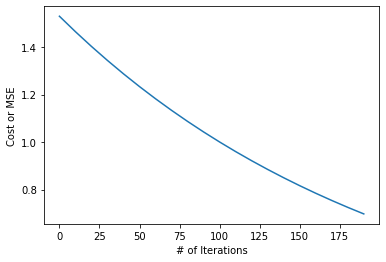

In [16]:
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("# of Iterations")
plt.ylabel("Cost or MSE");

In [17]:
# Running more iteration to further get to the minimum
alpha_df_1, b, w = run_gradient_descent(X, Y, alpha=0.01, num_iterations=2000)

Final estimate of b & w: 2.774489385785389e-16 [ 0.75306591  0.53648155 -0.00433069]


In [18]:
alpha_df_2, b, w = run_gradient_descent(X, Y, alpha=0.001, num_iterations=2000)

Final estimate of b & w: 0.011664695556930518 [0.74315125 0.52779959 0.01171703]


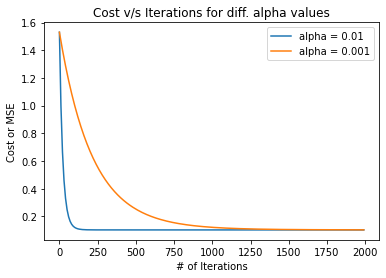

In [19]:
plt.plot(alpha_df_1.iteration, alpha_df_1.cost, label='alpha = 0.01')
plt.plot(alpha_df_2.iteration, alpha_df_2.cost, label='alpha = 0.001')
plt.legend()
plt.xlabel("# of Iterations")
plt.ylabel("Cost or MSE")
plt.title("Cost v/s Iterations for diff. alpha values");

**We can see that learning for alpha = 0.01 is faster than 0.001. For smaller alpha values, learning can be slower whereas higher learning rate can lead to skipping minima of the cost function. Thus we need to find optimal learning rate.**

## ***1.2 Using Scikit-Learn***

#### **Steps for Building ML Models**
1. Identify the features and outcome variable in the dataset.  
2. Split the dataset into training and test sets.(Usually 60-80% data for training set is kept and rest for testing set)  
3. Build the model using training set.  
4. Predict outcome variable using a test set.  
5. Compare the predicted and actual values of the outcome variable in the test set and measure  accuracy using measures such as mean absolute percentage error (MAPE) or root mean square  error (RMSE). 

### ***Building the Model***

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sales_df[['TV', 'Radio', 'Newspaper']], sales_df.Sales, test_size=0.3, random_state=42)

Steps for building model in sklearn:
1. Initialze the model
2. Invoke *fit()* method on the model and pass the input(X) & output(Y) values.
3. *fit()* will run the algo. and return the final estimated parameters.

In [21]:
from sklearn.linear_model import LinearRegression

# Initialize the model
linReg = LinearRegression()
# Fitting on training data
linReg.fit(X_train, y_train)

LinearRegression()

In [22]:
# The parameters
linReg.intercept_

2.70894909251591

In [23]:
linReg.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [24]:
list(zip(['TV', 'Radio', 'Newspaper'], list(linReg.coef_)))

[('TV', 0.0440592809574652),
 ('Radio', 0.19928749689893954),
 ('Newspaper', 0.006882452222275431)]

The estimated model is:
$$Sales = 2.708 + 0.044\times TV + 0.199\times Radio + 0.006\times Newspaper$$

**The weights are diff. than estimated earlier, this is becoz we have not normalized/standardized the values in this model.**

In [25]:
# Making prediction test set
# predicting y value
y_pred = linReg.predict(X_test)

In [26]:
# creating a DF to compare values
test_pred_df = pd.DataFrame({'actual': y_test,
                            'predicted': np.round(y_pred, 2),
                            'residuals': y_test - y_pred})

# Randomly showing 10 samples
test_pred_df.sample(10)

,actual,predicted,residuals
126,6.6,11.15,-4.553147
170,8.4,7.35,1.049715
95,16.9,16.57,0.334604
195,7.6,5.22,2.375645
115,12.6,13.36,-0.755569
38,10.1,10.17,-0.070454
56,5.5,8.92,-3.415494
165,11.9,14.30,-2.402060
173,11.7,11.63,0.068431
9,10.6,12.18,-1.576049


### ***Measuring Accuracy***

In [27]:
# RMSE and R-squared are two key accuracy measures for Linear Regg. as discussed earlier

from sklearn import metrics

In [28]:
# R-Squared value
y_pred = linReg.predict(X_test)
r2 = metrics.r2_score(y_train, linReg.predict(X_train))
print("R Squrared:", r2)
print(f"The model explains {r2*100: .3f}% of the variance in Y.")

R Squrared: 0.9055159502227753
The model explains  90.552% of the variance in Y.


In [29]:
# RMSE(Root mean squared error)
mse = metrics.mean_squared_error(y_test, y_pred)
# Taking root
rmse = np.round(np.sqrt(mse), 2)
print("RMSE: ", rmse)
print("The RMSE value indicates the model prediction has a standard deviation of 1.95")

RMSE:  1.95
The RMSE value indicates the model prediction has a standard deviation of 1.95


#### ***To understand the model error in detail, we need to understand the components of the error term  and how to deal with those components for improving model performance.***

## ***1.3 Bias-Variance Trade-off***

#### ***<u>Understanding Overfitting & Underfitting</u>***

***Model errors can be decomposed into two components: <u>bias and variance</u>. Understanding these two  components is key to diagnosing model accuracies and avoiding model overfitting or underfitting.<br><u>High bias can lead to building underfitting model, whereas high variance can lead to overfitting models.***

In [30]:
curve = pd.read_csv(os.getcwd()+"/Data/curve.csv")
curve.head()

,x,y
0,2,-1.999618
1,2,-1.999618
2,8,-3.978312
3,9,-1.969175
4,10,-0.957770


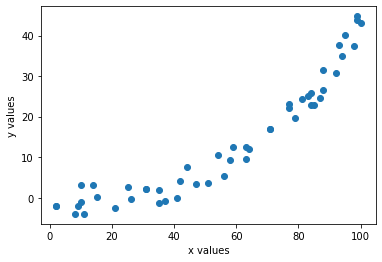

In [31]:
plt.scatter(curve.x, curve.y)
plt.xlabel("x values")
plt.ylabel("y values");

- The relationship b/w x and y is some polynomial form.
- To explore various polynomial forms, polyfit() from numpy library can be used. polyfit() takes X and  Y values, and the degree of x features to be used to fit a model.
- Degree 1 means only value of x is used to  predict y, whereas degree 2 means x and x^2 are used to predict y. 

In [32]:
def fit_poly(degree):
    p = np.polyfit(curve.x, curve.y, deg= degree)
    curve['fit'] = np.polyval(p, curve.x)
    # draw the regg. line after fitting the model
    sns.regplot(curve.x, curve.y, fit_reg=False)
    # Plot the actual x & y values
    return plt.plot(curve.x, curve.fit, label = 'fit')

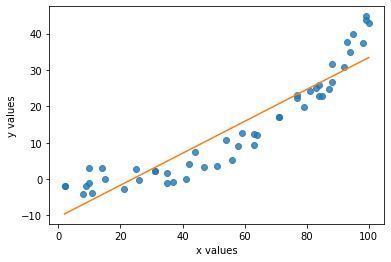

In [33]:
# Fitting the model with degree = 1 i.e. y = bx + e
fit_poly(1)
plt.xlabel("x values")
plt.ylabel("y values");

Linear Model, from the fig. we can see model does fit with deg = 1. It is not able to learn from the data as a simplistic model is assumed.<br>
**<u>This is the case of underfitting or bias.**

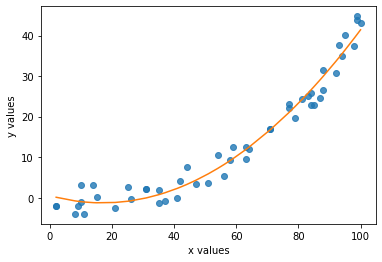

In [34]:
# with degree = 2 i.e a quadratic polynomial
fit_poly(2)
plt.xlabel("x values")
plt.ylabel("y values");

# The regg. line seems to fit the data better than the previous model. But not sure if this is the **best model**

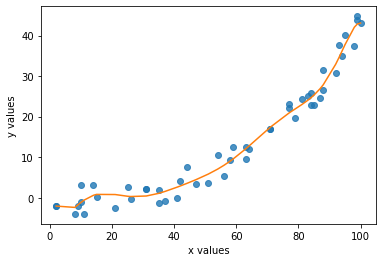

In [35]:
# with deg = 10 i.e a deg 10 polynomial 
fit_poly(10)
plt.xlabel("x values")
plt.ylabel("y values");

It can be observed above that as we build models with more and more polynomial terms, the model starts to fit every data point in the training set. **<u>This is the case of overfitting</u>.** <br>The model  with polynomial terms up to degree 10 will be sensitive to any changes in training examples. Any  addition and removal of a single observation from the dataset can alter the model parameters  significantly.  

- ***An underfitting model has a large error because of high bias, and an overfitting model has a large error because of high variance.*** 

- **An optimal model will be somewhere between an underfitting and an  overfitting model, and will have low bias and low variance. This can be observed by comparing RMSE in  training and test sets.** 

In [36]:
train_X, test_X, train_y, test_y = train_test_split(curve.x, curve.y, test_size=0.4, random_state=100)

# DataFrame to store 'degree' & 'rmse' fro traing and test set
rmse_df = pd.DataFrame(columns=['degree', "rmse_train", "rmse_test"])

# Defining a method to return rmse give actual & predicted values
def get_rmse(y, y_fit):
    return np.sqrt(metrics.mean_squared_error(y, y_fit))

# Iterate from degree ranging 1 - 15
for i in range(1, 15):
    # fitting model
    p = np.polyfit(train_X, train_y, deg=i)
    # storing the values
    rmse_df.loc[i-1] = [i, get_rmse(train_y, np.polyval(p, train_X)), get_rmse(test_y, np.polyval(p, test_X))]

In [37]:
rmse_df

,degree,rmse_train,rmse_test
0,1.0,5.226638,5.779652
1,2.0,2.394509,2.755286
2,3.0,2.233547,2.560184
3,4.0,2.231998,2.549205
4,5.0,2.197528,2.428728
5,6.0,2.062201,2.703880
6,7.0,2.039408,2.909237
7,8.0,1.995852,3.270892
8,9.0,1.979322,3.120420
9,10.0,1.976326,3.115875


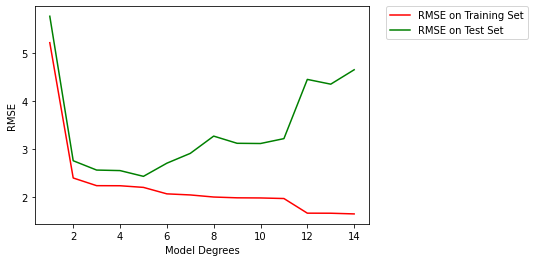

In [38]:
# Plotting the rmse for training set in red color
plt.plot(rmse_df.degree, rmse_df.rmse_train, label='RMSE on Training Set', color='r')

# Plotting the rmse for test set in green color
plt.plot(rmse_df.degree, rmse_df.rmse_test, label='RMSE on Test Set', color='g')

plt.legend(bbox_to_anchor= (1.05,1), loc = 2, borderaxespad=0)
plt.xlabel("Model Degrees")
plt.ylabel("RMSE");

Three key observations from above plot: 
   1. Error on the test set are high for the model with complexity of degree 1 and degree 15.  
   2. Error on the test set reduces initially, however increases after a specific level of complexity.  
   3. Error on the training set decreases continuously.  
   
The degree can also be associated with complexity. It can be observed that as complexity (number of  polynomial terms in the model) increases, the model starts to fit to train and test data well. But beyond  a specific level of complexity (i.e., complexity level 5), the training error continues to reduce, but the test  error starts to increase again. This is a point where the model starts to overfit the training set and stops  generalizing. So, the optimal model complexity is 5, which has low bias and low variance.

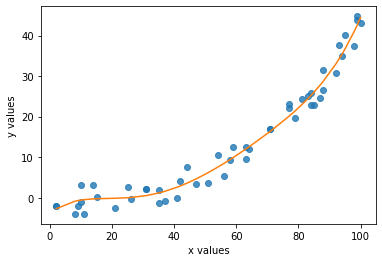

In [39]:
# with deg = 5 i.e a deg 5 polynomial, this is the best fit given by above analysis
fit_poly(5)
plt.xlabel("x values")
plt.ylabel("y values");

## ***1.4 K-Fold Cross Validation***

- **K-fold cross-validation is a robust validation approach that can be adopted <u>to verify if the model is overfitting</u>.** 

- *The model, which generalizes well and does not overfit, should not be very sensitive to any  change in underlying training samples.* K-fold cross-validation can do this by building and validating  multiple models by resampling multiple training and validation sets from the original dataset.

- The following steps are used in K-fold cross-validation:  
    1. *<u>Split the training data set into K subsets of equal size. Each subset will be called a fold</u>.* Let the  folds be labelled as $f_1,f_2,\cdots,f_K$. Generally, the value of K is taken to be 5 or 10.  
    2. For i = 1 to K  
       (a) Fold $f_i$ is used as validation set and all the remaining K – 1 folds as training set.  
       (b) Train the model using the training set and calculate the accuracy of the model in fold $f_i$.  
<br><br>   

- Calculate the final accuracy by averaging the accuracies in the test data across all K models. The average  accuracy value shows how the model will behave in the real world. 
- ***The variance of these accuracies is an  indication of the robustness of the model.***

![k-fold_cross_validation](k-fold_cross_validation.png)

## ***1.5 Advanced Regression Models*** 

### ***1.5.1 Building a Linear Regg. Model*** 
Building a linear regression model to understand the shortcomings and then proceed to advanced regression models.<br>
Using IPL dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.pandas.set_option("display.max_columns", None)

In [40]:
ipl_auction_df = pd.read_csv(os.getcwd()+"\Data\IPL IMB381IPL2013.csv")
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [41]:
ipl_auction_df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [42]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE','T-RUNS', 'T-WKTS',
              'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
              'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 
              'SIXERS', 'RUNS-C','WKTS', 'AVE-BL', 'ECON', 'SR-BL']

# Out of these are four features that need to be encoded into dummy features using OHE(One Hot Encoding)

categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

ipl_auction_encoded_df = pd.get_dummies(data = ipl_auction_df[X_features], columns = categorical_features, drop_first= True)

In [43]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [44]:
X = ipl_auction_encoded_df
Y = ipl_auction_df['SOLD PRICE']

**Standardization of X & Y**<br>

Standardization is the process of bringing all features or variables into one single scale (normalized  scale). This can be done by subtracting mean from the values and dividing by the standard deviation of the feature or variable. Standardizing helps to manage difference in scales of measurements of different variables.

$$X \rightarrow \frac{X - \mu}{\sigma}$$

In [45]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
X_scaler = StandardScaler()
# Standardize all the feature columns
X_scaled = X_scaler.fit_transform(X)

# Standarding Y
Y = (Y - Y.mean())/Y.std()

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

**Stochastic Gradient Descent**

*SGDRegressor* in *sklearn.linear_model* is a variation of gradient descent algorithm for building linear regression model. Gradient descent algorithm uses all the training examples to learn to minimize the cost function,  whereas *SGDRegressor(Stochastic Gradient Descent)* uses a subset of examples in each iteration for learning.

https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31

In [47]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [48]:
linreg.coef_

array([-0.43539611, -0.04632556,  0.50840867, -0.03323988,  0.2220377 ,
       -0.05065703,  0.17282657, -0.49173336,  0.58571405, -0.11654753,
        0.24880095,  0.09546057,  0.16428731,  0.26400753, -0.08253341,
       -0.28643889, -0.26842214, -0.21910913, -0.02622351,  0.24817898,
        0.18760332,  0.10776084,  0.04737488,  0.05191335,  0.01235245,
        0.00547115, -0.03124706,  0.08530192,  0.01790803, -0.05077454,
        0.18745577])

The sign of the coefficients indicates positive or negative effect on a player’s SOLD PRICE. We will store  the beta coefficients and respective column names in a DataFrame and then sort the coefficient values in  descending order to observe the effects.

In [49]:
columns_coef_df = pd.DataFrame({'columns': ipl_auction_encoded_df.columns,
                               'coef': linreg.coef_})

# Sorting the features by coeff. values
sorted_coef_vals = columns_coef_df.sort_values(by='coef', ascending=False)

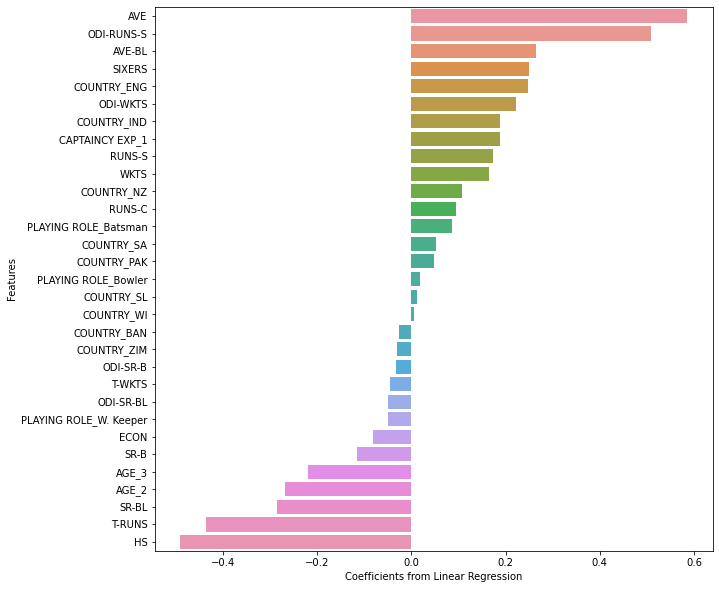

In [50]:
plt.figure(figsize=(10,10))
sns.barplot(x='coef', y='columns', data=sorted_coef_vals)
plt.xlabel("Coefficients from Linear Regression")
plt.ylabel("Features");

Observation from the above plot:
1. AVE, ODI-RUNS-S, SIXERS are top three highly influential features which determine the  player’s SOLD PRICE.

2. Higher ECON, SR-B and AGE have negative effect on SOLD PRICE.  

3. Interestingly, higher test runs (T-Runs) and highest score (HS) have negative effect on the SOLD  PRICE. 

- Note that few of these counter-intuitive sign for coefficients could be due to multicollinearity. For example, we expect SR-B (batting strike rate) to have a positive effect on the  SOLD PRICE.

**Calculating RMSE**

We can calculate the RMSE on training and test sets to understand the model’s ability to predict SOLD  PRICE. We will develop an utility method *get_train_test_rmse()* to calculate and print the RMSE of train  and test sets for comparison. It will take the model as a parameter.

In [51]:
from sklearn import metrics

# Take the model as parameter 
# Print the RMSE on train & test set
def get_train_test_rmse(model):
    # On Training set
    y_train_pred = model.predict(X_train)
    # rmse
    rmse_train = round(np.sqrt(metrics.mean_squared_error(y_train,
                                                        y_train_pred)), 3)
    
    # On test set
    y_test_pred = model.predict(X_test)
    # rmse
    rmse_test = round(np.sqrt(metrics.mean_squared_error(y_test,
                                                         y_test_pred)), 3)
    print("train:", rmse_train, ", test:", rmse_test)

In [52]:
get_train_test_rmse(linreg)

train: 0.679 , test: 0.749


RMSE on the training set is 0.679, while it is 0.749 on the test set. 

- **A good model that generalizes well  needs to have a very similar error on training and test sets. Large difference indicates that the model  may be overfitting to the training set. <u>Most widely used approach to deal with model overfitting is called  Regularization.**

### ***1.5.2 Applying Regularization***

- **<u>One way to deal with overfitting is regularization</u>.** 

- *<u>It is observed that overfitting is typically caused by  inflation of the coefficients</u>.* To avoid overfitting, the coefficients should be regulated by penalizing potential inflation of coefficients. 

- Regularization applies penalties on parameters if they inflate to large  values and keeps them from being weighted too heavily. The coefficients are penalized by adding the coefficient terms to the cost function. If the coefficients  become large, the cost increases significantly. So, the optimizer controls the coefficient values to minimize the cost function.

Following are the two approaches that can be used for adding a penalty to the  cost function:  
1. **<u>L1 Norm</u>:** Summation of the absolute value of the coefficients. This is also called **Least Absolute  Shrinkage and Selection Operator(LASSO Term)**. The corresponding cost function is given by<br>$$\epsilon_{mse} = \frac{1}{N}\sum_{i=1}^{N}(Y_i - (\beta_0 + \beta_1X_1 + \cdots + \beta_nX_n))^2 + \alpha \sum_{i=1}^{n}|\beta_i|$$ where $\alpha$ is the multiplier.

2. **<u>L2 Norm</u>:** Summation of the squared value of the coefficients. This is called **Ridge Term**. The cost function is given by <br>$$\epsilon_{mse} = \frac{1}{N}\sum_{i=1}^{N}(Y_i - (\beta_0 + \beta_1X_1 + \cdots + \beta_nX_n))^2 + \alpha \sum_{i=1}^{n}\beta_i^2$$  


- ***<u>Ridge term distributes (smoothens) the coefficient values across all the features, whereas LASSO seems  to reduce some of the coefficients to zero.</u>***

- ***Features with coefficients value as zero can be treated as features with no contribution to the model. So, <u>LASSO can also be used for feature selection</u>,i.e., remove features with zero coefficients, thereby reducing the number of features.***

![lasso_ridge_terms](lasso_ridge_terms.png)

### ***Ridge Regression***

*sklearn.linear_model* provides *Ridge regression* *for building linear models by applying L2 penalty*.  
Ridge regression takes the following parameters:  
1. alpha$(\alpha)$ – float – is the regularization strength; regularization strength must be a positive float.<br> Regularization improves the estimation of the parameters and reduces the variance of the estimates.<br> Larger values of alpha imply stronger regularization.  
2. max_iter – int (integer) – is the maximum number of iterations for the gradient solver.

In [53]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha= 1, max_iter= 500)
ridge.fit(X_train, y_train)

Ridge(alpha=1, max_iter=500)

In [54]:
get_train_test_rmse(ridge)

train: 0.68 , test: 0.724


In [55]:
# the diff. in RMSE on train and test has reduced becoz of penalty effect.
# the diff. can be reduced by applying stronger penalty

ridge = Ridge(alpha=2, max_iter=1000)
ridge.fit(X_train, y_train)
get_train_test_rmse(ridge)

train: 0.682 , test: 0.706


- The difference in model accuracy on training and test has reduced. 
- We need to calculate the optimal value for $\alpha$. This can be achieved in many ways. Multiple values of $\alpha$ can be tested before arriving at the  optimal value. 
- ***The parameters which can be tuned are called <u>hyperparameters</u> in machine learning. Here $\alpha$ is a hyperparameter.***  
- *sklearn.model_selection.GridSearchCV* can help search for the optimal value

### ***LASSO Regression***
- *sklearn.linear_model* provides *LASSO regression* for building linear models by applying L1 penalty. 
- Two key parameters for LASSO regression are:  
    1. alpha – float – multiplies the L1 term. Default value is set to 1.0.  
    2. max_iter – int – Maximum number of iterations for gradient solver.

In [69]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01, max_iter=500)
lasso.fit(X_train, y_train)
get_train_test_rmse(lasso)

train: 0.688 , test: 0.698


- It can be noticed that the model is not overfitting and the difference between train RMSE and test RMSE  is very small. 

- **LASSO reduces some of the coefficient values to 0, which indicates that these features are  not necessary for explaining the variance in the outcome variable.**

In [76]:
lasso.coef_.tolist()[1] == 0

True

In [79]:
# Storing the feature names and coefficient values in the DataFrame 
lasso_coef_df = pd.DataFrame({'columns': ipl_auction_encoded_df.columns,
                              'coef': lasso.coef_})

In [80]:
# filtering out coeffs. with zero
lasso_coef_df[lasso_coef_df.coef == 0]

# These features do not influence predicting the SOLD PRICE as the respective coefficients are 0.

,columns,coef
1,T-WKTS,-0.0
3,ODI-SR-B,-0.0
13,AVE-BL,-0.0
28,PLAYING ROLE_Bowler,0.0


### ***Elastic Net Regression***

- **ElasticNet regression combines both L1 and L2 regularizations to build a regression model.** The corresponding cost function is given by
$$\epsilon_{mse} = \frac{1}{N}\sum_{i=1}^{N}(Y_i - (\beta_0 + \beta_1X_1 + \cdots + \beta_nX_n))^2 + \gamma \sum_{i=1}^{n}|\beta_i| + \sigma \sum_{i=1}^{n}\beta_i^2$$ 

- While building *ElasticNet* regression model, both **hypterparameters $\sigma(L2) \text{ and } \gamma(L1)$** need to be set. <br>*ElasticNet* takes foll. 2 parameters:
    1. *alpha* -> $alpha = \sigma + \gamma$. Default value is set to 1.0.
    2. *l1_ratio* -> The *ElasticNet* mixing parameters, with $0 <= l1\_ratio <= 1$. $$l1\_ratio = \frac{\gamma}{\sigma + \gamma}$$ where <br> *l1_ratio* = 0 -> penalty is an *L2 penalty*. <br> *l1_ratio* = 1 -> it is an *L1 penalty*. <br> $0 < l1\_ratio < 1$ -> the penalty is a combination of L1 & L2.

In [81]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha = 1.01, l1_ratio= 0.001, max_iter= 500)
enet.fit(X_train, y_train)
get_train_test_rmse(enet)

train: 0.789 , test: 0.665


As we can see, applying both the regularizations did not improve the model performance. It has become  worse. In this case, we can choose to apply only L1 (LASSO) regularization, which seems to deal with the  overfitting problem efficiently.

#### ***Reference: Pradhan, Manaranjan; U Dinesh Kumar. Machine Learning using Python. Kindle Edition.*** 